In [19]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler #Standardize the data
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer


In [20]:
# Load built-in breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['Target'] = data.target


In [21]:
# Display basic dataset information
print("Dataset shape:", df.shape)
print("\nFirst five rows of the dataset:")
df.head()


Dataset shape: (569, 31)

First five rows of the dataset:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [22]:
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
# Separate features and target variable
X = df.iloc[:, :-1].values  # Features
y = df['Target'].values     # Target


In [24]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [25]:
# Perform PCA
pca = PCA(n_components=4)  # Specify the number of principal components
principalComponents = pca.fit_transform(X_scaled)


In [27]:
# Create a DataFrame for the PCA results
principalDf = pd.DataFrame(data=principalComponents,
                           columns=['Principal Component 1',
                                    'Principal Component 2',
                                    'Principal Component 3',
                                    'Principal Component 3'])


In [28]:
principalDf.head()


,Principal Component 1,Principal Component 2,Principal Component 3,Principal Component 3
0,9.192837,1.948583,-1.123166,-3.633731
1,2.387802,-3.768172,-0.529293,-1.118264
2,5.733896,-1.075174,-0.551748,-0.912083
3,7.122953,10.275589,-3.232790,-0.152547
4,3.935302,-1.948072,1.389767,-2.940639


In [10]:
# Add the target variable to the PCA DataFrame
finalDf = pd.concat([principalDf, pd.DataFrame(y, columns=['Target'])], axis=1)


In [11]:
# Display the final DataFrame
print("\nFinal DataFrame with PCA components:")
print(finalDf.head())



Final DataFrame with PCA components:
   Principal Component 1  Principal Component 2  Principal Component 3  Target
0               9.192837               1.948583              -1.123166       0
1               2.387802              -3.768172              -0.529293       0
2               5.733896              -1.075174              -0.551748       0
3               7.122953              10.275589              -3.232790       0
4               3.935302              -1.948072               1.389767       0


In [12]:
# Explained variance ratio
explained_variance = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
print("\nExplained variance ratio (percentage):", explained_variance)



Explained variance ratio (percentage): [44.3 19.   9.4]


In [13]:
# Cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative variance explained:", cumulative_variance)



Cumulative variance explained: [0.44272026 0.63243208 0.72636371]


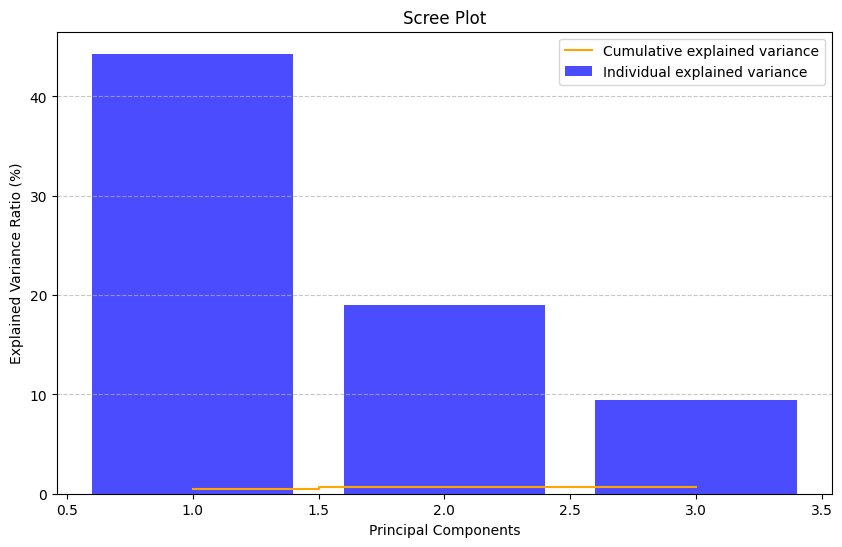

In [ ]:
# Visualizations

## 1. Scree plot for explained variance
plt.figure(figsize=(10, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.7, align='center',
        color='b', label='Individual explained variance')
plt.step(range(1, len(cumulative_variance) + 1), cumulative_variance, where='mid', color='orange',
         label='Cumulative explained variance')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio (%)')
plt.title('Scree Plot')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


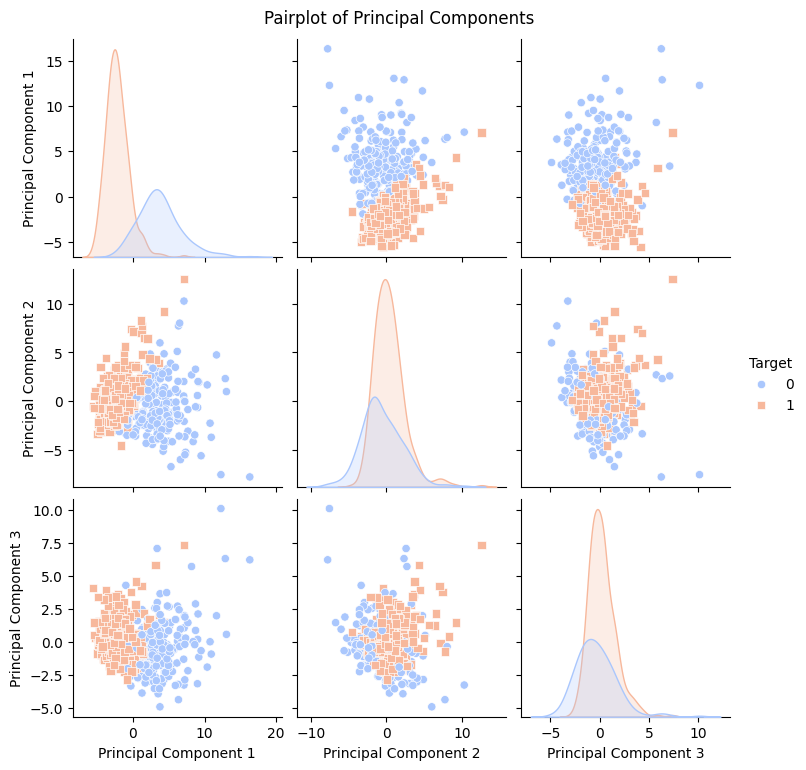

In [ ]:
## 2. Pairplot of the PCA-transformed data
sns.pairplot(finalDf, hue="Target", diag_kind='kde',
             palette='coolwarm',
             markers=['o', 's'])
plt.suptitle('Pairplot of Principal Components', y=1.02)
plt.show()


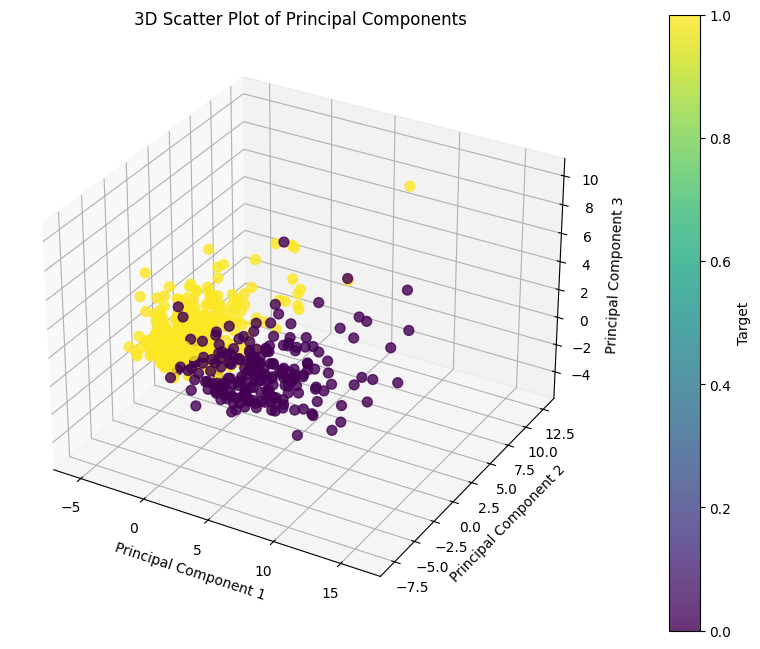

In [ ]:
## 3. 3D Scatter Plot for the First Three Principal Components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(principalDf['Principal Component 1'],
                     principalDf['Principal Component 2'],
                     principalDf['Principal Component 3'],
                     c=y, cmap='viridis', s=50, alpha=0.8)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D Scatter Plot of Principal Components')
plt.colorbar(scatter, ax=ax, pad=0.1, label='Target')
plt.show()


In [17]:
# Interpret PCA results
print("\nInterpretation:")
print(f"- The first principal component explains {explained_variance[0]}% of the variance.")
print(f"- The second principal component explains {explained_variance[1]}% of the variance.")
print(f"- Together, the first three components explain {sum(explained_variance[:3])}% of the total variance.")



Interpretation:
- The first principal component explains 44.3% of the variance.
- The second principal component explains 19.0% of the variance.
- Together, the first three components explain 72.7% of the total variance.
